In [75]:
## JUAN GUALDRIA // NICOLAS SANCHEZ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-red.csv', delimiter=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
# Se entrena el clasificador con Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_LR= LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

# Se evalúa el clasificador
score_LR = clf_LR.score(X_test, y_test)
print('Score:', score_LR)

# se hace predicción
y_pred = clf_LR.predict(X_test)

Score: 0.55


c:\Users\jufeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\jufeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# Se entrena el clasificador con SVM (pruebe hiperpar ́ametros hasta obtener el mejor modelo).
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf_SVM= make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_SVM.fit(X_train, y_train)

# Se evalúa el clasificador
score_SVC = clf_SVM.score(X_test, y_test)
print('Score:', score_SVC)


Score: 0.603125


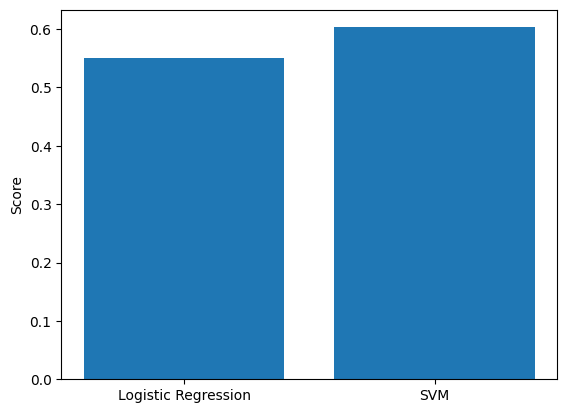

In [55]:
# Se grafica la comparación de los resultados de ambos entrenamientos
fig, ax = plt.subplots()
ax.bar(['Logistic Regression', 'SVM'], [score_LR, score_SVC])
ax.set_ylabel('Score')
plt.show()



In [76]:
# Determinar el mejor modelo
if score_LR > score_SVC:
    best_model = clf_LR
    print('El mejor modelo es Regresión Logística.')
else:
    best_model = clf_SVM
    print('El mejor modelo es SVM.')

# Ejemplo de entrada (ajusta los valores según tu caso)
example_input = np.array([[11.3,0.62,0.67,5.2,0.086,6,19,0.9988,3.22,0.69,13.4]])

# Normalizar el ejemplo si es necesario (para SVM)
if best_model == clf_SVM:
    # Extraer el scaler del pipeline
    scaler = best_model.named_steps['standardscaler']
    example_input = scaler.transform(example_input)

# Realizar la predicción con el mejor modelo
prediction = best_model.predict(example_input)
print('La calidad del vino predicha es:', prediction[0])


El mejor modelo es SVM.
La calidad del vino predicha es: 5


c:\Users\jufeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\jufeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
